## ✨ Step 1: Install the Required Library

In [13]:
# Install Quandl if not already installed
!pip install quandl

In [14]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [15]:
import quandl

# Set your Quandl API Key
quandl.ApiConfig.api_key = "BbCWxgYeXxsyQSZRd_V4"


## ✨ Step 2: Load Your Dataset
Now, I load the cleaned_kc_house_data.csv dataset into a pandas DataFrame.

In [16]:
import pandas as pd

# Define the file path and load the dataset
file_path = r"C:\Users\Asus\Music\King_County_Housing_Project\notebooks\cleaned_kc_house_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## ✨ Step 3: Subset the Data
📌 **Objective:**  
We need to select a **time-series variable** related to housing prices.  

📆 **Date Format Issue:**  
- The date column is in **`YYYYMMDDT000000`** format.  
- We need to **convert it** to a proper **datetime format** for analysis.

In [17]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Subset the dataset to only include date and price
df_subset = df[['date', 'price']].sort_values(by='date')

# Reset the index
df_subset.set_index('date', inplace=True)

# Display the first few rows
df_subset.head()

,price
date,
2014-05-02,437500.0
2014-05-02,790000.0
2014-05-02,675000.0
2014-05-02,555000.0
2014-05-02,440000.0


# 📅 **Explanation: Preparing the Time-Series Data**  

✅ **What We Did:**  
1️⃣ **Converted** the date column into a proper **datetime format**.  
2️⃣ **Selected** only the **date** and **price** columns for analysis.  
3️⃣ **Sorted** the values by date to maintain chronological order.  
4️⃣ **Set** the date column as the **index** for time-series analysis.  

📊 **Why This is Important?**  
- Ensures **accurate** time-series trends.  
- Allows us to use **time-based indexing** for analysis.  
- Helps in creating **visualizations** like line charts for price trends.  

## ✨ Step 4 : Line Chart of Housing Prices
We visualize the trend of housing prices over time.

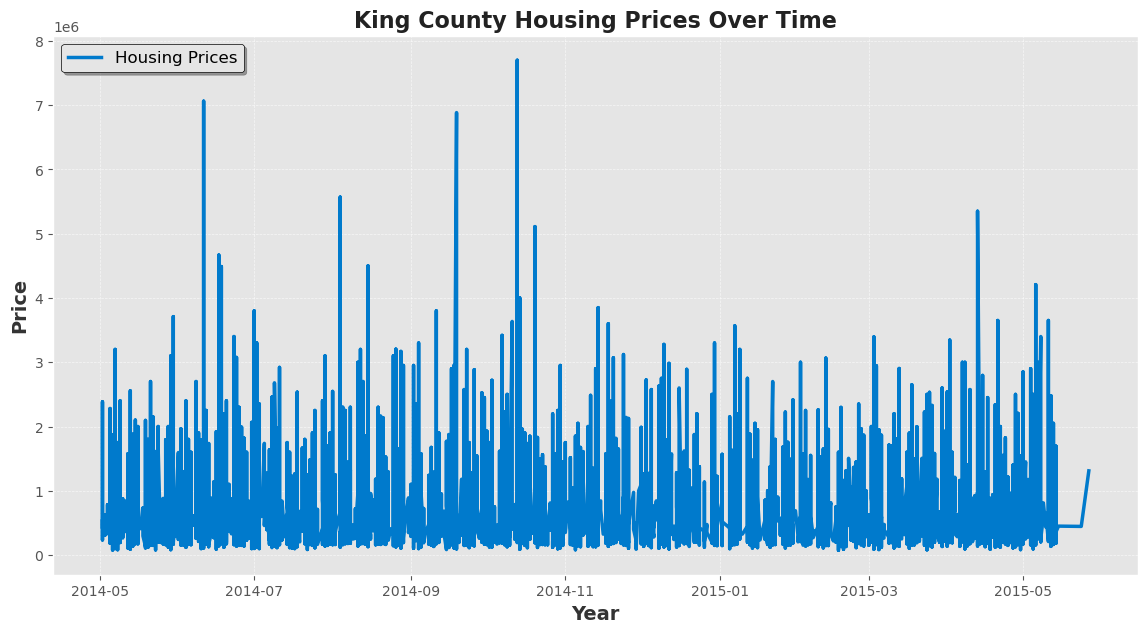

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
plt.style.use('ggplot')

# Create the figure and axis
plt.figure(figsize=(14, 7))

# Plot the housing prices with enhanced visualization
plt.plot(df_subset, color='#007acc', linewidth=2.5, label='Housing Prices')

# Improve labels and title with professional styling
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Price', fontsize=14, fontweight='bold', color='#333333')
plt.title('King County Housing Prices Over Time', fontsize=16, fontweight='bold', color='#222222')

# Add a grid for better readability
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Customize the legend
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True, edgecolor='black')

# Show the plot
plt.show()

### 📊 Analysis  
This helps us visualize whether housing prices are **increasing, decreasing, or fluctuating** over time.

## ✨ Step 5: Decomposing Time-Series Data
I use seasonal decomposition to break the data into trend, seasonality, and residual components.

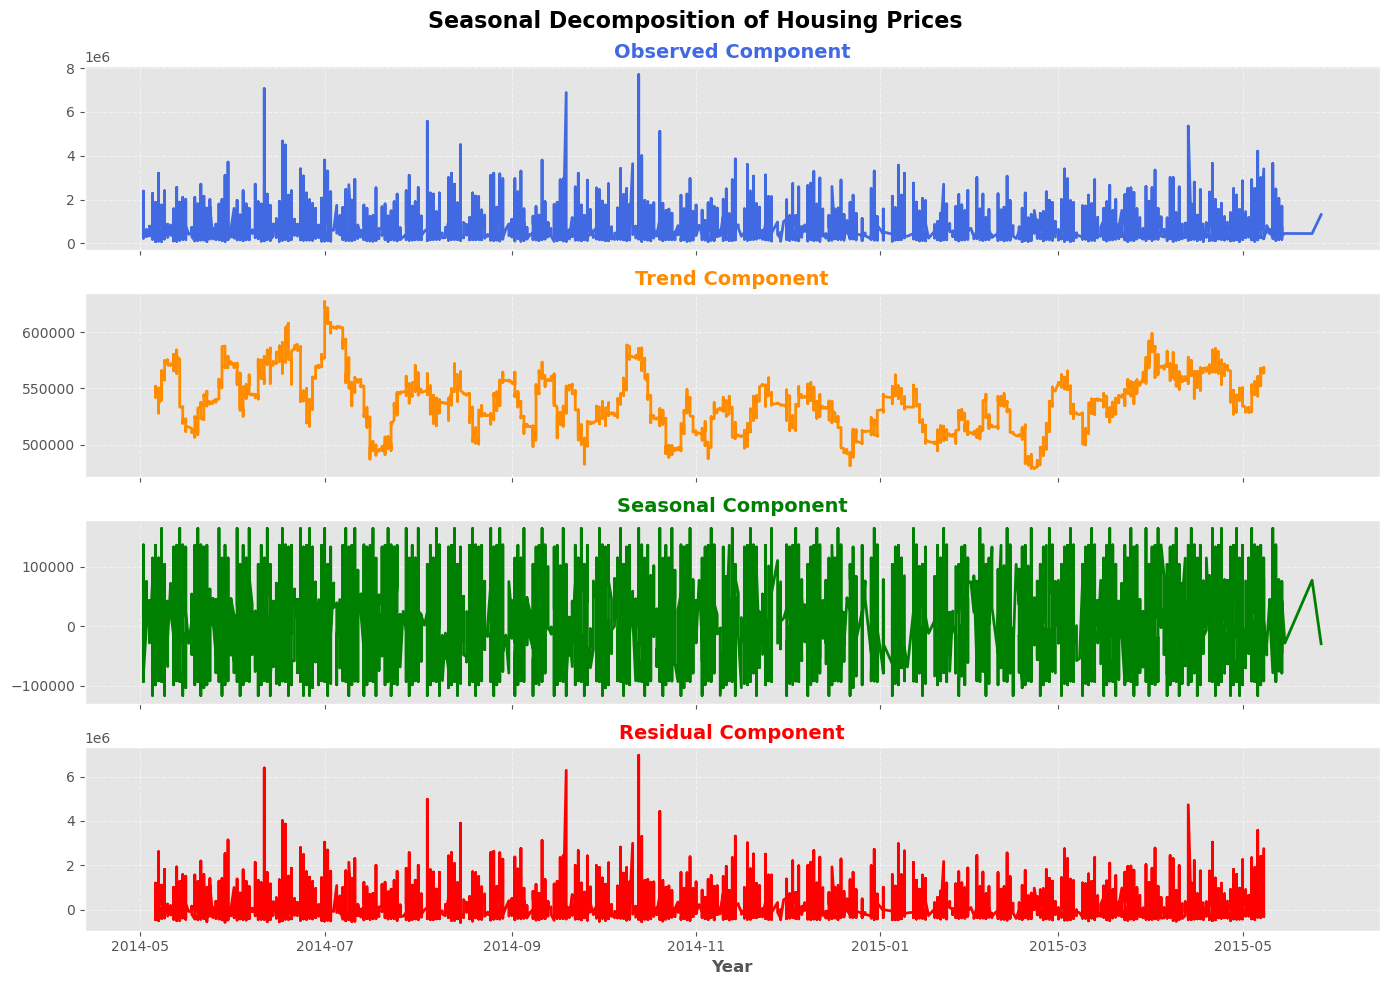

In [23]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_subset, model='additive', period=365)

# Create a styled plot
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
components = ['Observed', 'Trend', 'Seasonal', 'Residual']
colors = ['royalblue', 'darkorange', 'green', 'red']

# Plot each component with better aesthetics
for i, (ax, component, color) in enumerate(zip(axes, [decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], colors)):
    ax.plot(component, color=color, linewidth=2)
    ax.set_title(f"{components[i]} Component", fontsize=14, fontweight='bold', color=color)
    ax.grid(True, linestyle='--', alpha=0.5)

# Improve overall layout
plt.suptitle('Seasonal Decomposition of Housing Prices', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## 📊 Analysis  

### 🔹 Trend  
Shows the long-term movement of house prices.  

### 🔹 Seasonality  
Highlights seasonal fluctuations.  

### 🔹 Residual  
Represents unexplained variations.  

## ✨ Step 6: Dickey-Fuller Test for Stationarity
The Dickey-Fuller test checks if our time series is stationary (constant mean and variance over time).

In [24]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test
result = adfuller(df_subset['price'])

# Print the results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}'

ADF Statistic: -145.52877881571612
p-value: 0.0
Critical Values:
   1%: -3.4306526132180357
   5%: -2.8616737449562932
   10%: -2.566841188690269


## 📌 Interpretation  

### 📖 Hypotheses  
- **Null Hypothesis (H₀):** The data is *not* stationary.  
- **Alternative Hypothesis (H₁):** The data *is* stationary.  

### 📊 Decision Criteria  
✅ If **p-value < 0.05** → **Reject H₀** → The data is **stationary**.  
❌ If **p-value > 0.05** → **Fail to Reject H₀** → The data is **not stationary**, and we need **differencing**.  

## ✨ Step 7: Differencing to Make Data Stationary
If the Dickey-Fuller test indicates that the data isn't stationary, we apply differencing.

In [26]:
# First-order differencing
df_subset_diff = df_subset.diff().dropna()

# Re-run the Dickey-Fuller test
result_diff = adfuller(df_subset_diff['price'])

# Print the results
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')

ADF Statistic after differencing: -36.99906432723354
p-value: 0.0


## 🔄 Additional Differencing  

If the **p-value is still > 0.05**, we apply **another round of differencing** to make the data stationary.  

In [27]:
df_subset_diff2 = df_subset_diff.diff().dropna()

# Re-run the test
result_diff2 = adfuller(df_subset_diff2['price'])
print(f'ADF Statistic after second differencing: {result_diff2[0]}')
print(f'p-value: {result_diff2[1]}')

ADF Statistic after second differencing: -47.870530224929446
p-value: 0.0


## ✨ Step 8 : Check for Autocorrelations
We use Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots to analyze dependencies in the dataset.

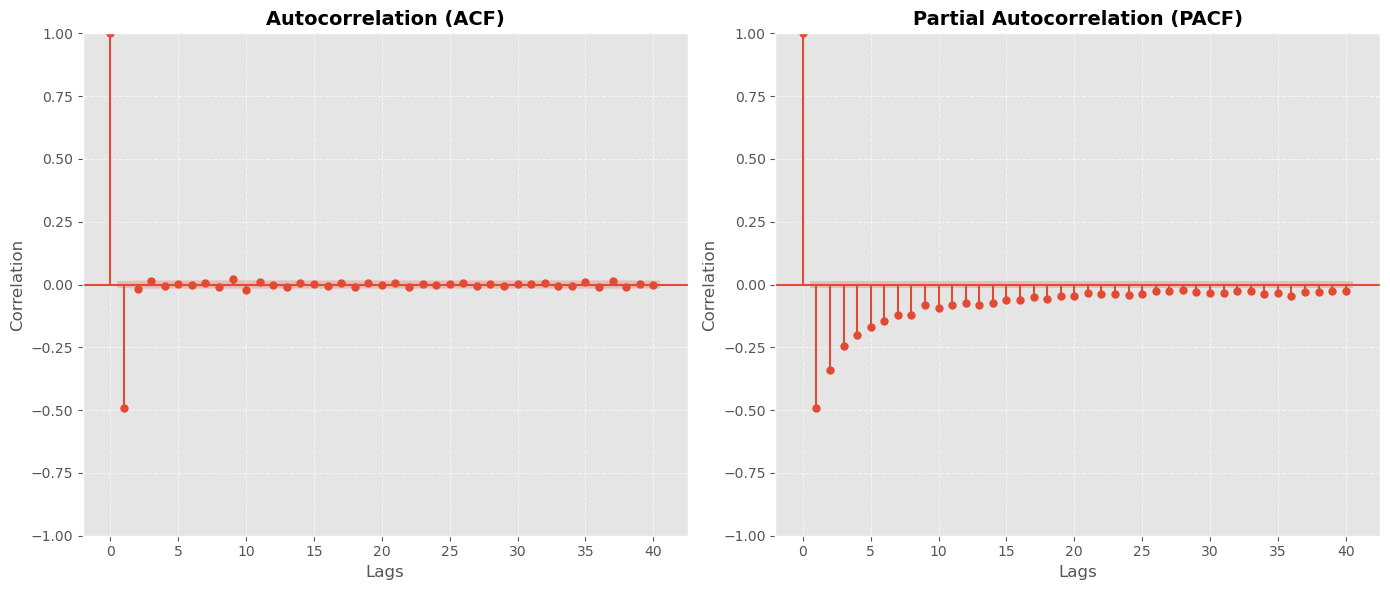

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use a built-in Matplotlib style for a clean look
plt.style.use('ggplot')  

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Autocorrelation (ACF)
plot_acf(df_subset_diff['price'], ax=axes[0], lags=40)
axes[0].set_title("Autocorrelation (ACF)", fontsize=14, fontweight='bold')  # Removed 📈
axes[0].set_xlabel("Lags", fontsize=12)
axes[0].set_ylabel("Correlation", fontsize=12)
axes[0].grid(True, linestyle="--", alpha=0.6)

# Plot Partial Autocorrelation (PACF)
plot_pacf(df_subset_diff['price'], ax=axes[1], lags=40, method='ywm')
axes[1].set_title("Partial Autocorrelation (PACF)", fontsize=14, fontweight='bold')  # Removed 📊
axes[1].set_xlabel("Lags", fontsize=12)
axes[1].set_ylabel("Correlation", fontsize=12)
axes[1].grid(True, linestyle="--", alpha=0.6)

# Improve spacing
plt.tight_layout()

# Show the plots
plt.show()

## ✨ :  Analysis  
- **ACF** tells us how past values influence future values.  
- **PACF** helps identify the order of an **ARIMA** model if needed.


## ✨ Step 10: Save and Submit

In [33]:
# Save the cleaned dataset
df_subset.to_csv(r"C:\Users\Asus\Music\King_County_Housing_Project\notebooks\processed_kc_house_data.csv")